### Geração de Patches em Zig - Zag


In [11]:
from PIL import Image
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [12]:
path_image = "../../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (90, 90), 'RGB')

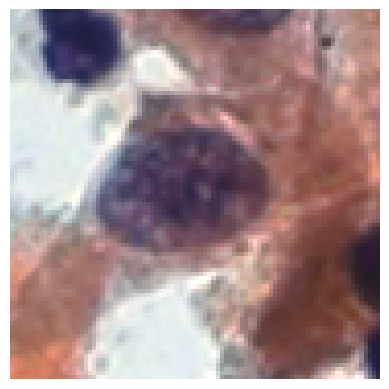

In [13]:
plt.imshow(im)
plt.axis('off')
plt.show()

Algoritmo para Gerar Centros em Zig Zag

In [14]:
def visualize_patch_centers(image, centers, patch_size):
    fig, ax = plt.subplots(1)
    
    image_np = np.array(image)
    
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (w, h) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    plt.axis('off')
    plt.show()

In [156]:
def generete_prox_centro_diagonal(ponto_atual, distance, angle_deg):

  angle_rad = np.radians(angle_deg)

  delta_x = int(distance * np.cos(angle_rad)) 
  delta_y = int(distance * np.sin(angle_rad)) 

  new_x = ponto_atual[0] - delta_x
  new_y = ponto_atual[1] + delta_y
  
  return (new_x, new_y)

[(8, 8), (24, 8), (40, 8), (56, 8), (72, 8), (88, 8), (104, 8), (120, 8), (136, 8), (152, 8), (168, 8), (184, 8), (200, 8), (216, 8), (201, 11), (186, 14), (171, 17), (156, 20), (141, 23), (126, 26), (111, 29), (96, 32), (81, 35), (66, 38), (51, 41), (36, 44), (21, 47), (6, 50), (8, 50), (24, 50), (40, 50), (56, 50), (72, 50), (88, 50), (104, 50), (120, 50), (136, 50), (152, 50), (168, 50), (184, 50), (200, 50), (216, 50), (201, 53), (186, 56), (171, 59), (156, 62), (141, 65), (126, 68), (111, 71), (96, 74), (81, 77), (66, 80), (51, 83), (36, 86), (21, 89), (6, 92), (8, 92), (24, 92), (40, 92), (56, 92), (72, 92), (88, 92), (104, 92), (120, 92), (136, 92), (152, 92), (168, 92), (184, 92), (200, 92), (216, 92), (201, 95), (186, 98), (171, 101), (156, 104), (141, 107), (126, 110), (111, 113), (96, 116), (81, 119), (66, 122), (51, 125), (36, 128), (21, 131), (6, 134), (8, 134), (24, 134), (40, 134), (56, 134), (72, 134), (88, 134), (104, 134), (120, 134), (136, 134), (152, 134), (168, 134

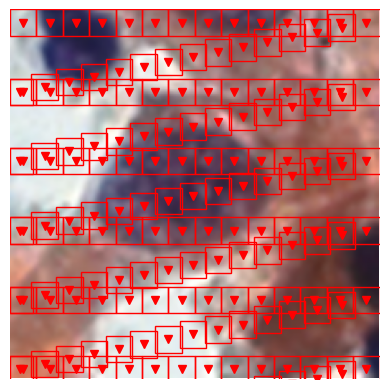

In [277]:

# Funcao certa
def generate_horizontal_line(inicio, y):
  
  center = []
  for x in range (inicio, 224, inicio*2):
          center.append((x,y))
  return center



# Funcao Certa
def generate_diagonal_line(coord_init):
  
  
  center = []
  
  angle = 13
  distance = 16
  
  center.append(generete_prox_centro_diagonal(coord_init, distance, angle))
  
  
  contador = 0
  while center[-1][0] >= 8:
    center.append(generete_prox_centro_diagonal(center[-1], distance, angle))
    contador += 1
    
  
  return center
  

def generate_zig_zag_centers(): 
  center = []

  
  center.extend(generate_horizontal_line(8, 8))
  
  
  while len(center) <= 196:
  
    center.extend(generate_diagonal_line(center[-1]))
    center.extend(generate_horizontal_line(8, center[-1][1]))
  
  
  
  for _ in range(len(center)-196):
    center.pop()  
  
  
  
  return center
  
      
    
  
  
  
img_zig_zag = generate_zig_zag_centers()
print(img_zig_zag)
print(len(img_zig_zag))

resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, img_zig_zag, (16,16))

[(112.0, 112.0), (114.82842712474618, 114.82842712474618), (110.02952319076493, 111.22696616668773), (117.0416793054, 115.07789678460155), (107.68489768250296, 111.54935067303998), (119.3982081481432, 114.15671676462036), (105.4401603204167, 113.07371129884487), (121.40724187092927, 112.04789125649769), (103.78689877658707, 115.7253236811205), (122.59250784050025, 108.9173087182061), (103.17017662557933, 119.25041329417496), (122.55536320908786, 105.10069452938811), (103.92811730261798, 123.23976038019478), (121.03078498334193, 101.06998910932415), (106.24194815262373, 127.17152747767312), (117.92982888962959, 97.38237771005593), (110.10231789066727, 130.46908306977895), (113.36347427430542, 94.61709764300716), (115.2961037367816, 132.56792033976524), (107.64462050372322, 93.30655505104627), (121.41586943702941, 132.98466870097818), (101.26721256659549, 93.86905000054706), (127.89181972683626, 131.38078541178677), (94.86383602198762, 96.55044960530549), (134.04374572550893, 127.6138472

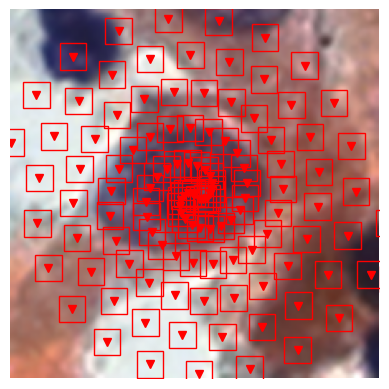

In [86]:
def calculate_prox_coordenada_spiral(ponto, r, theta, radius_increment=4, angle_increment=np.pi/4):
  x_new = ponto[0] + r * np.cos(theta)
  y_new = ponto[1] + r * np.sin(theta)
  
  
  
  r += radius_increment
  theta += angle_increment
  
  return (x_new, y_new), r, theta





px_inicial = (112,112)

center = []


value, r, theta = calculate_prox_coordenada_spiral(px_inicial, 0, 0)
center.append(value)

while len(center) < 196:

  value, r, theta = calculate_prox_coordenada_spiral(center[-1], r, theta, radius_increment=2, angle_increment=3)
  
  if value[0] >=0 and value[1] >=1:
    center.append(value)
  

print(center)
print(len(center))
resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, center, (16,16))  
  
  